## Task 5: Decision Trees and Random Forests
 ##  Objective: Learn tree-based models for classification & regression. 

In [3]:
# import required libraries

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [4]:
# Load and understand the data

df = pd.read_csv('C:\\Users\\prach\\Downloads\\heart.csv ')
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [5]:
#  define feature and target

X = df.drop("target",axis=1)                     # feature 
Y = df["target"]                                # Label (0 is no disease, 1= disease )

In [6]:
# split the data into train and test 
#  80% into training and 20% in test 

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size= 0.2,random_state=42)

In [7]:
# Train a decision tree classifier
#      -: train a decision tree and evaluate it using sccuracy and precision/recall metrics

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dt))
print(classification_report(Y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



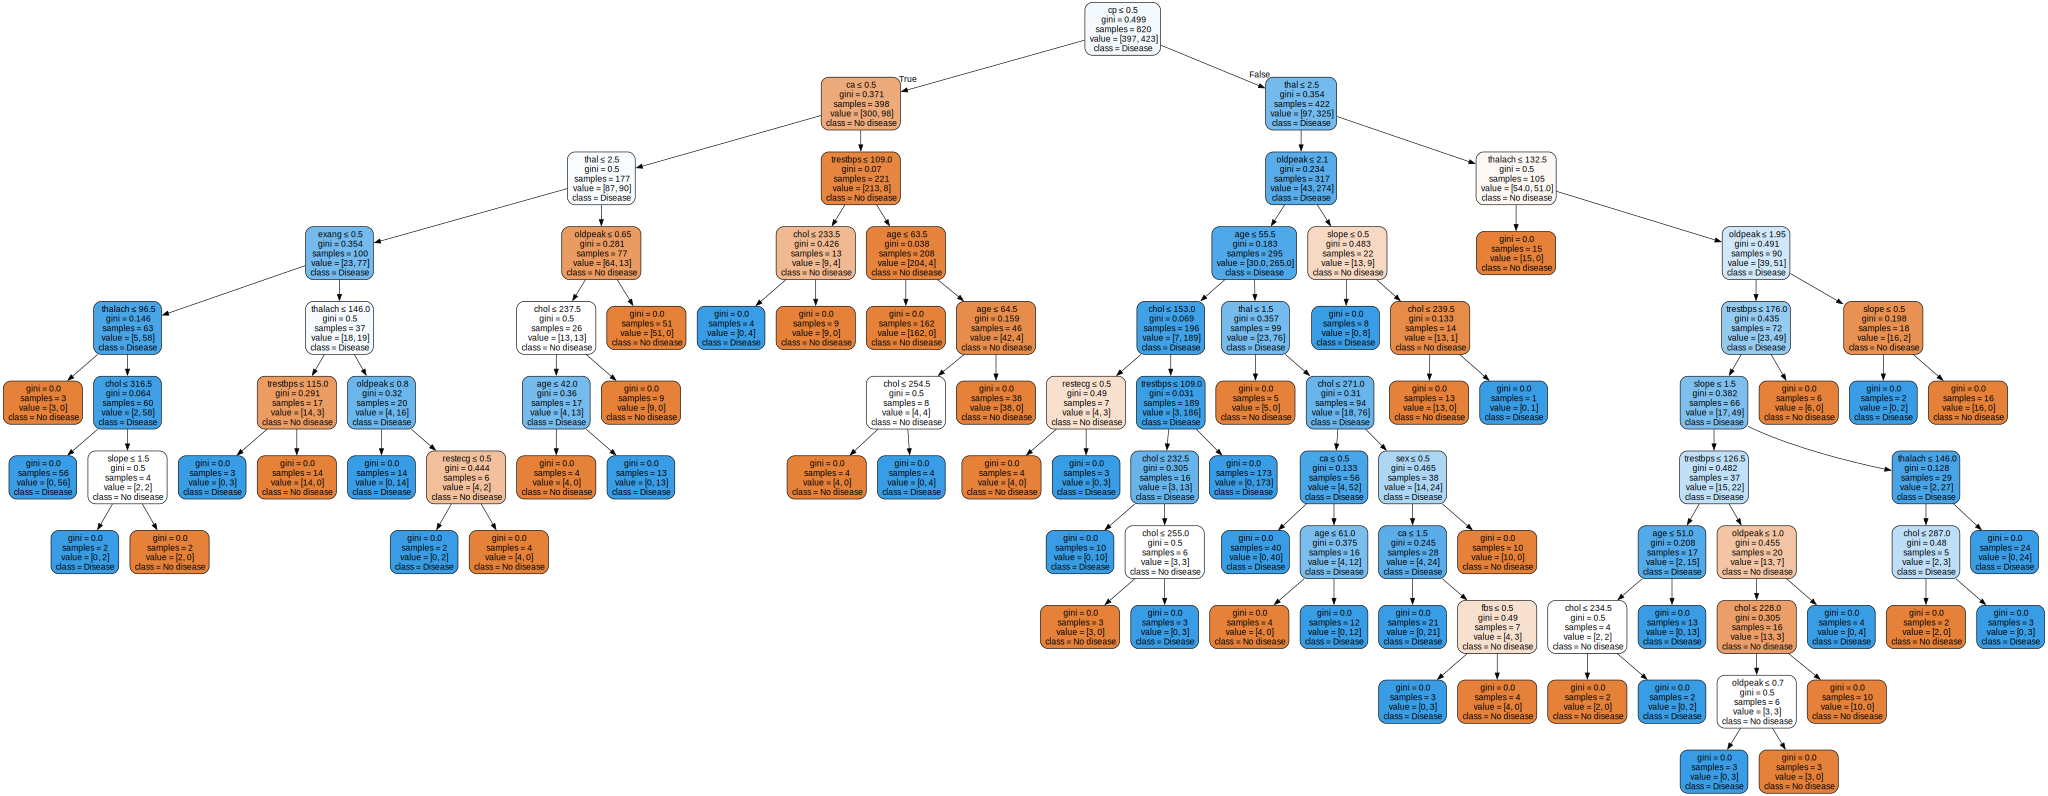

In [10]:
# visualize the decision tree 
import graphviz
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt

dot_data = export_graphviz(
    dt, out_file=None,feature_names=X.columns,
    class_names= ["No disease", "Disease"],
    filled = True, rounded = True, special_characters = True
)
 # plt.show()
graphviz.Source(dot_data)

In [11]:
# control tree depth(Avoid Overfitting )
dt_pruned= DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train,Y_train)

y_pred_pruned= dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_pruned))

Pruned Decision Tree Accuracy: 0.8


In [12]:
# train a random forest classifier

rf= RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


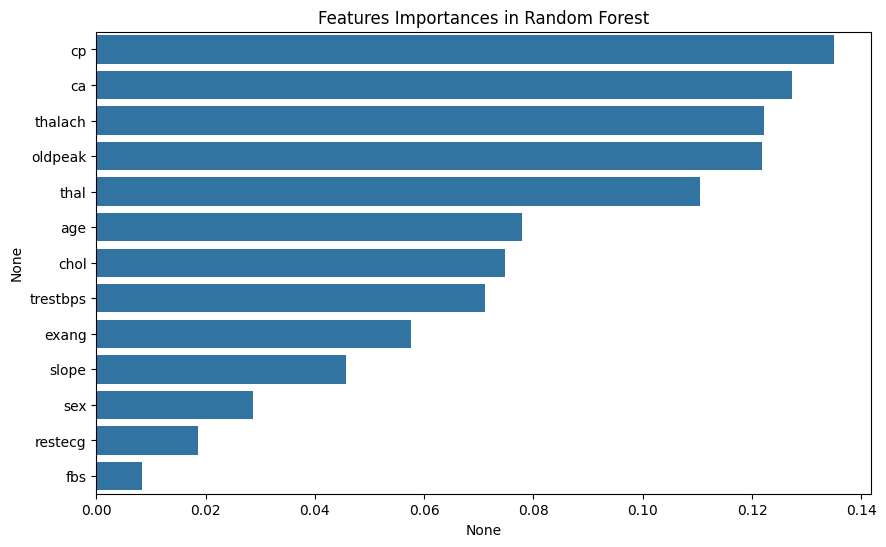

In [21]:
# feature importance 

importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=features, y= features.index)
# sns.barplot(x=features.values, y=features.index, palette="viridis")      # coluor bars
plt.title("Features Importances in Random Forest")
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X,Y,cv=5)
print("Cross- validation Scores:",cv_scores)
print("Mean Accuracy:",cv_scores.mean())

Cross- validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073


## ✅ Conclusion & Results
Trained and visualized a Decision Tree classifier on the Heart Disease dataset.

Applied pruning (max_depth=4) to control overfitting, achieving 80% accuracy.

Trained a Random Forest classifier, which achieved 98.5% accuracy on the test set.

Performed cross-validation with 5 folds, resulting in a high mean accuracy of ~99.7%.

Analyzed feature importances, identifying the most influential features in prediction.

Overall, tree-based models performed strongly, making them suitable for this classification task.


